# Деревья решений

**Как строится дерево решений**

Дерево решений — это иерархическая модель, которая делит данные на подмножества на основе условий в узлах (состоящих из признаков и пороговых значений). В каждом узле принимается решение о том, как разделить данные, чтобы максимизировать различие между классами или минимизировать разброс в случае регрессии.

Процесс построения дерева решений:

1. **Выбор признака для разделения**:
   - На каждом шаге выбирается признак, по которому лучше всего разделить данные. Этот выбор основан на критерии, который измеряет качество разделения.
   - Для **классификации** обычно используются:
     - **Критерий Джини (Gini impurity)** — мера "нечистоты" узла, которая вычисляется как:

       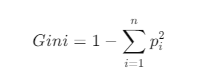\
     
     - **Энтропия** — мера неоднородности:

       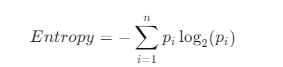\
   - Для **регрессии** может использоваться:
     - **Среднеквадратическая ошибка** или **разброс** (variance).

2. **Разделение данных**:
   - После выбора признака дерево решений выбирает пороговое значение, которое лучше всего разделяет объекты на две группы. Эти группы должны быть максимально однородными по классу (или иметь минимальный разброс для регрессии).
   
3. **Рекурсивное деление**:
   - Процесс повторяется для каждой новой ветви, пока данные не будут разделены настолько, что каждый узел содержит данные, принадлежащие одному классу (или пока не достигнут максимальной глубины дерева).
   
4. **Остановка**:
   - Деление продолжается до тех пор, пока не достигнут один из критериев остановки:
     - Все объекты в узле принадлежат одному классу.
     - Достигнута максимальная глубина дерева.
     - Количество объектов в узле меньше определённого порога (например, меньше минимального количества объектов для разделения).

Пример работы дерева:
На каждом этапе дерево решений выбирает признак и пороговое значение, которые позволяют получить наилучшее разделение данных. Затем дерево рекурсивно строится, пока не достигнет условий остановки.

---
